In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# Get project files
PATH = 'E:\Programming\Python\Dataset\cats_and_dogs_new'

train_dir = os.path.join(PATH, 'training_set')
validation_dir = os.path.join(PATH, 'validation_set')
test_dir = os.path.join(PATH, 'test_set')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 40
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [4]:
train_image_generator = ImageDataGenerator(rescale = 1. /255)
validation_image_generator = ImageDataGenerator(rescale = 1. /255)
test_image_generator = ImageDataGenerator(rescale = 1. /255)

In [5]:
train_data_gen = train_image_generator.flow_from_directory(directory=train_dir , batch_size=128 , target_size= (150,150), class_mode="binary")
val_data_gen = validation_image_generator.flow_from_directory(directory=validation_dir , batch_size=128 , target_size= (150,150), class_mode="binary" )
test_data_gen = test_image_generator.flow_from_directory(directory=PATH, classes=['test_set'] , batch_size=1 , target_size= (150,150), class_mode=None, shuffle=False )

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


In [6]:
from tensorflow.keras import datasets, layers, models

In [7]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32,(3,3),activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,3)))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128,(3,3),activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))

    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

    return model

In [8]:
model = define_model()

In [9]:
history = model.fit(train_data_gen,
                    epochs=epochs,
                    steps_per_epoch=int(np.ceil(total_train/float(batch_size))),
                    validation_data=val_data_gen,
                    validation_steps=(int(np.ceil(total_val/float(batch_size))))
                    )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 63 steps, validate for 16 steps
Epoch 1/40
63/63 [==============================] - 111s 2s/step - loss: 0.7501 - accuracy: 0.5071 - val_loss: 0.6917 - val_accuracy: 0.5465
Epoch 2/40
63/63 [==============================] - 9s 144ms/step - loss: 0.6822 - accuracy: 0.5615 - val_loss: 0.6517 - val_accuracy: 0.6415
Epoch 3/40
63/63 [==============================] - 9s 144ms/step - loss: 0.6441 - accuracy: 0.6290 - val_loss: 0.6116 - val_accuracy: 0.6700
Epoch 4/40
63/63 [==============================] - 9s 140ms/step - loss: 0.5768 - accuracy: 0.7003 - val_loss: 0.5633 - val_accuracy: 0.7215
Epoch 5/40
63/63 [==============================] - 10s 153ms/step - loss: 0.5503 - accuracy: 0.7218 - val_loss: 0.5337 - val_accuracy: 0.7275
Epoch 6/40
63/63 [==============================] - 9s 141ms/step - loss: 0.5167 - accuracy: 0.7380 - val_loss: 0.5049 - val_accuracy: 0.7580
Epoch 7/40
63/63 [==============================] - 9s 1

In [11]:
probabilities = model.predict(test_data_gen)

In [13]:
prediction = model.predict_classes(test_data_gen,batch_size = None)

In [14]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

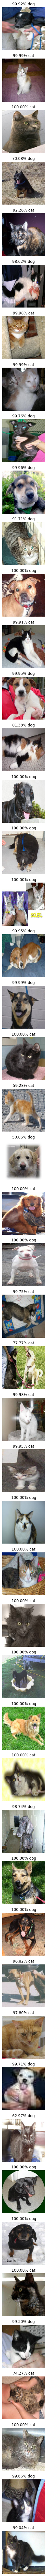

In [15]:
plotImages([test_data_gen[i][0] for i in range(50)],probabilities=probabilities,)

In [22]:
model.save('cats_dogs.h5') 